# PA 1: Exploratory Analysis over Dataset_R

## Student Details

Student Name and ID: 

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'dataset_python.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
<b>[2.5 points]</b>

 ## Assignment Details

In this assignment, you will explore, manipulate and play with the data.

You will prepare a report with the following outline for each one of the dataset. Look at the following Example.

1.	Introduction

2.	Retrieving the Data

3.	Glimpse of Data

4.	Check for missing data

5.	Data Exploration

6.  Include a paragraph describing the contribution made by each team member


You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Python, Weka and R. DO Task 1, Task 2, Task 3, Task 4 using Python, Weka, R.
 
**Out of the 3 datasets listed below:**

**1. Dataset_python should be solved using Python in Jupyter notebook only.**

**2. Dataset_Weka using WEKA**

**3. Dataset_R using R**


You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details

In this assignment, you will work on dataset_R. The columns of the data-set are:

- Loan Status - Loan approved (Y/N)
- Loan_ID - Unique Loan ID
- Gender - Male/ Female
- Married - Applicant married (Y/N)
- Dependents - Number of dependents
- Education Applicant - Education (Graduate/ Under Graduate)
- Self_Employed Self - employed (Y/N)
- ApplicantIncome - Applicant income
- CoapplicantIncome - Coapplicant income
- LoanAmount - Loan amount in thousands
- Loan_Amount_Term - Term of loan in months
- Credit_History - credit history meets guidelines
- Property_Area - Urban/ Semi Urban/ Rural)

In [1]:
# Import R packages 
#Array processing
library(reticulate)
use_python("/Users/rachanaramireddy/opt/anaconda3/bin/python", required = T)
np <- import("numpy")
#Data analysis, wrangling and common exploratory operations
pd <- import("pandas")
Series <- pd$Series
DataFrame <- pd$DataFrame
itertools <- import("itertools")
chain <- itertools$chain

In [2]:
# Read the dataset_R CSV file 
df_data <- pd$read_csv('Dataset_R.csv', encoding='latin1')

In [3]:
# return the first 10 rows of the dataset
head(df_data,10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<list>,<list>,<list>,<chr>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
6,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
7,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
8,LP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N
9,LP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y


# Task 1: Statistical Exploratory Data Analysis(17.5 points)

In [4]:
# 1-a Print the details of dataframe and find out the number of rows and columns in dataset
str(df_data)
cat("No of rows in dataset", nrow(df_data))
cat("\n")
cat("No of columns in dataset", ncol(df_data))
cat("\n")


'data.frame':	614 obs. of  13 variables:
 $ Loan_ID          : chr  "LP001002" "LP001003" "LP001005" "LP001006" ...
 $ Gender           :List of 614
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Female"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : num NaN
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Female"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Female"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr "Male"
  ..$ : chr 

In [5]:
# 1-b Print descriptive detail of a column in dataset
cat("ApplicantIncome:\n")
summary(df_data$ApplicantIncome)

ApplicantIncome:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    150    2878    3812    5403    5795   81000 

In [6]:
# 1-c Check for missing values for each column in dataset
sapply(df_data, function(col) sum(is.na(col)))

Loan_ID            Gender           Married        Dependents 
                0                13                 3                15 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
                0                32                 0                 0 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
               22                14                50                 0 
      Loan_Status 
                0

In [14]:
# 1-d Data Pre-processing for R
# - handle null values, categorical data, missing data..etc.
#library(tidyr)
#df <- as.data.frame(lapply(df_data, unlist))
#any(is.na(df))
#df <- df[complete.cases(df),]
#df_complete <-  replace_na(df, list(Dependents = 0, LoanAmount = 0, Loan_Amount_Term=0,Credit_History=0))
df_data <- as.data.frame(lapply(df_data, unlist))
df_data[df_data == 'NaN'] <- NA
df <- df_data[complete.cases(df_data),]
cat("No of rows in dataset after cleaning", nrow(df))
sapply(df, function(col) sum(is.na(col)))
cat("\n")

No of rows in dataset after cleaning 480

Loan_ID            Gender           Married        Dependents 
                0                 0                 0                 0 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
                0                 0                 0                 0 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
                0                 0                 0                 0 
      Loan_Status 
                0

# Task 2: Aggregation & Filtering & Rank (30 points)

In [16]:
# Task 2-a: Find out the number of female graduates from Semiurban area
cat("the number of female graduates from Semiurban area: \n")
nrow(subset(df, Gender == "Female" & Property_Area == "Semiurban"))

the number of female graduates from Semiurban area: 


[1] 44

In [17]:
# Task 2-b: Determine the overall number of men with more than 3 Dependents, who did not graduate with Self employment
cat("the overall number of men with more than 3 Dependents, who did not graduate with Self employment: \n")
nrow(subset(df, Gender == "Male" & Education == "Not Graduate" & Dependents == "3+" & Self_Employed == "Yes"))

the overall number of men with more than 3 Dependents, who did not graduate with Self employment: 


[1] 2

In [18]:
# Task 2-c: Find the top 10 non-married female applicants who graduated with self employment and had the highest applicant income
data <- subset(df, Gender == "Female" & Married == "No" & Education == "Graduate" & Self_Employed == "Yes")
head(data[order(data$ApplicantIncome, decreasing = TRUE), ], 10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
317,LP002194,Female,No,0,Graduate,Yes,15759,0,55,360,1,Semiurban,Y
370,LP002377,Female,No,1,Graduate,Yes,8624,0,150,360,1,Semiurban,Y
347,LP002301,Female,No,0,Graduate,Yes,7441,0,194,360,1,Rural,N
529,LP002990,Female,No,0,Graduate,Yes,4583,0,133,360,0,Semiurban,N
245,LP001925,Female,No,0,Graduate,Yes,2600,1717,99,300,1,Semiurban,N


In [19]:
# Task 2-d: Find the number of self-employed male applicants from urban area with exactly two dependents 
cat("the number of self-employed male applicants from urban area with exactly two dependents: \n")
nrow(subset(df, Gender == "Male" & Property_Area == "Urban" & Dependents == "2" & Self_Employed == "Yes"))

the number of self-employed male applicants from urban area with exactly two dependents: 


[1] 3

# Task 3: Visualization (30 points)

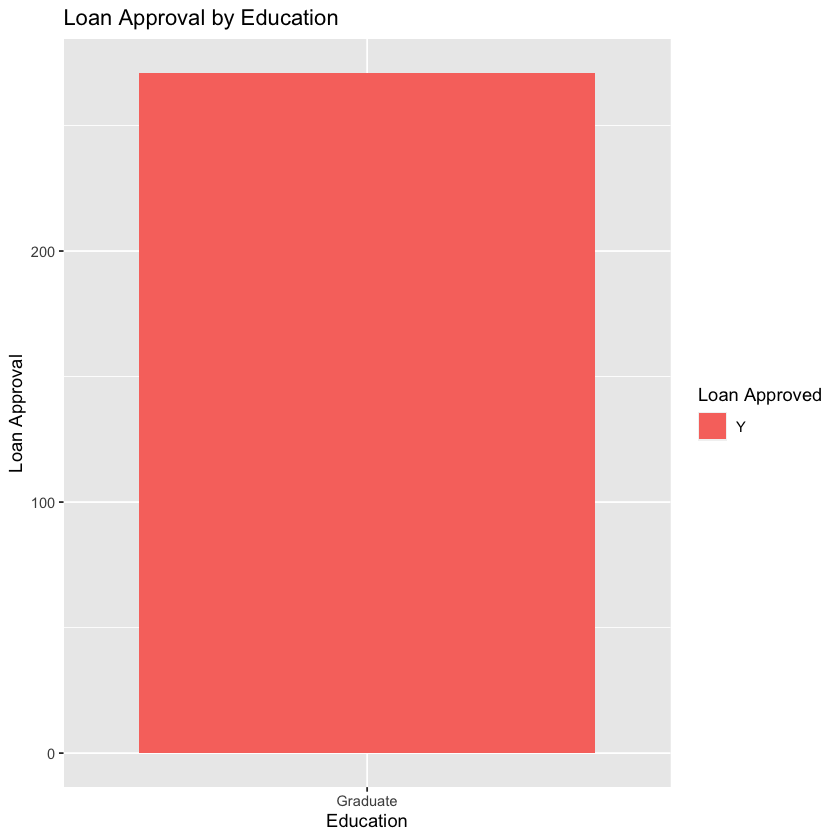

In [21]:
# Task 3-a Display a plot where educated applicants are granted loans
bar<-subset(df, Education == "Graduate" & Loan_Status == "Y")
library(ggplot2)
ggplot(bar, aes(x = Education, fill = Loan_Status)) + 
  geom_bar(position = "dodge") +
  labs(x = "Education", y = "Loan Approval", fill = "Loan Approved") +
  ggtitle("Loan Approval by Education")

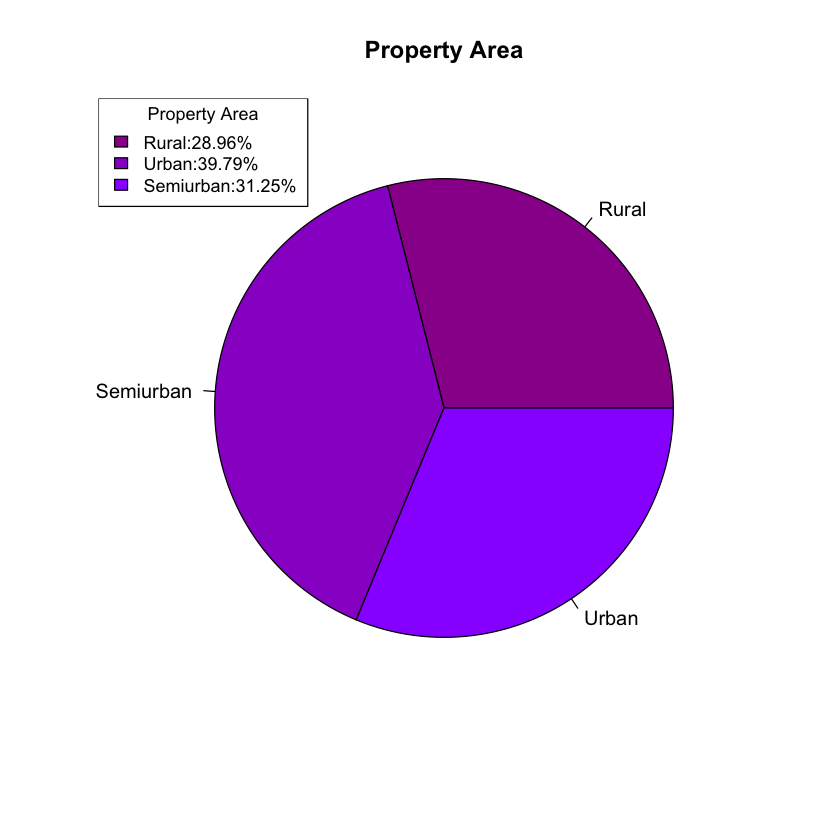

In [24]:
# Task 3-b Create a pie chart for Property_area and display percentages in legend respectively
library(ggplot2)
prop_area <- round(prop.table(table(df$Property_Area)) * 100, 2)

colors <- c("#990099", "#9900CC", "#9900FF")
pie(prop_area, main = "Property Area", col = colors)

legend("topleft", fill = colors, 
       cex = 0.9,title = "Property Area", 
       legend = paste0(unique(df$Property_Area),":",c(prop_area), "%"))

# Task 4: Insights from the data (20 points)
Find out 'interesting' information from the dataset. Give two insights and Create a visualization for each of the insights. Explain in a few lines your reasoning. 

Your work's uniqueness and quality will be taken into account when evaluating your work (having a meaningful result and an aesthetic visualization). 

In [33]:
# Code and explaination for Task4
cat("The data to include only self-employed applicants from urban areas based on gender\n")
plot <- subset(df, Property_Area != "Rural" & Self_Employed == "Yes")
nrow(plot)
# Create a box plot
boxplot(plot$Gender ~ plot$Gender, 
       xlab = "Gender", ylab = "Applicants", 
        main = "Self-employed Urban Applicants with Two Dependents by Gender", col = "lightblue",
        border = "black", ylim = c(0, max(plot$Gender)), 
        legend = c("Female", "Male"), bty = "n")

The data to include only self-employed applicants from urban areas based on gender


[1] 43

ERROR: Error in .subset2(x, i, exact = exact): attempt to select less than one element in integerOneIndex


References:https://www.datasciencemadesimple.com/descriptive-or-summary-statistics-in-r-2/#:~:text=Descriptive%20Statistics%20of%20the%20dataframe%20in%20R%20can,column%20Descriptive%20statistics%20with%20summary%20function%20in%20R

Contribution: